# Capstone project dataset 

The goal of this notebook is to explore the dataset that will be used for the capstone project. 
The dataset selected is the 'The German Traffic Sign Benchmark'. 
It can be downloaded from here: http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset.

In [25]:
#Import necessary libraries
import matplotlib.pyplot as plt
import csv
import numpy as np
from numpy.random import randn
import os, random
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline


## Load training data

### Read images and labels

In [6]:
# Sample code for reading the traffic sign images and the
# corresponding labels. This is a modificated version of the code provided here:
# http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset#Codesnippets

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 43 classes
    for c in range(0,43):    
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        
        #print (prefix)
        
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        
        #print (gtFile)
        
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        #gtReader.next() # skip header Python 2
        next(gtReader) # skip header Python 3
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

In [ ]:
#Read the training images and their corresponding labels
rootpath = 'C:/Users/alo/Desktop/PERSO/Course_Data_Science_2017/visualizations/TrainingData/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images'
images, labels = readTrafficSigns(rootpath)

In [12]:
#Note that images and labels are list.
#Create a numpy integer array from the list of strings 'labels'
labels_string = np.array(labels)
labels_int = labels_string.astype(np.int)

In [9]:
len(images), len(labels)

(39209, 39209)

In [10]:
# Function for reading example images
# A random image is selected to represent each class
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of example images, list of corresponding labels     
    
def readTrafficSignsExampleImages(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    imagesExample = [] # images
    labelsExample = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):  
        
        subdirectory = format(c, '05d')
        prefix = rootpath + '/' + subdirectory + '/' # subdirectory for class
          
        #Get all ppm files from the class subdirectory 
        files = [filename
                 for path, dirs, files in os.walk(prefix)
                 for filename in files
                 if filename.endswith(".ppm")]      
        
        #Get a random image
        filename = random.choice(files)      
              
        imagesExample.append(plt.imread(prefix + filename)) 
      
        #Get the label index from the subdirectory name, for example: 00036 -> 36
        label = str(int(subdirectory)) #remove leading zeros from subdirectory name = class label        
        labelsExample.append(label)  
       
    return imagesExample, labelsExample

In [3]:
#Function to display images and labels

def display_images_and_labels(images, labels):
    """Display the list of the given images.
    Labels are indicated in the figure titles."""
    
    plt.figure(figsize=(15, 15))
   
    #for label in labels:
    for n, (image, label) in enumerate(zip(images, labels)):
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, n+1)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ".format(label, labels.count(label)))      
    
        plt.imshow(image)
    plt.show()


In [4]:
# Read example training images
rootpath = 'C:/Users/alo/Desktop/PERSO/Course_Data_Science_2017/visualizations/TrainingData/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images'
imagesExample, labelsExample = readTrafficSignsExampleImages(rootpath)

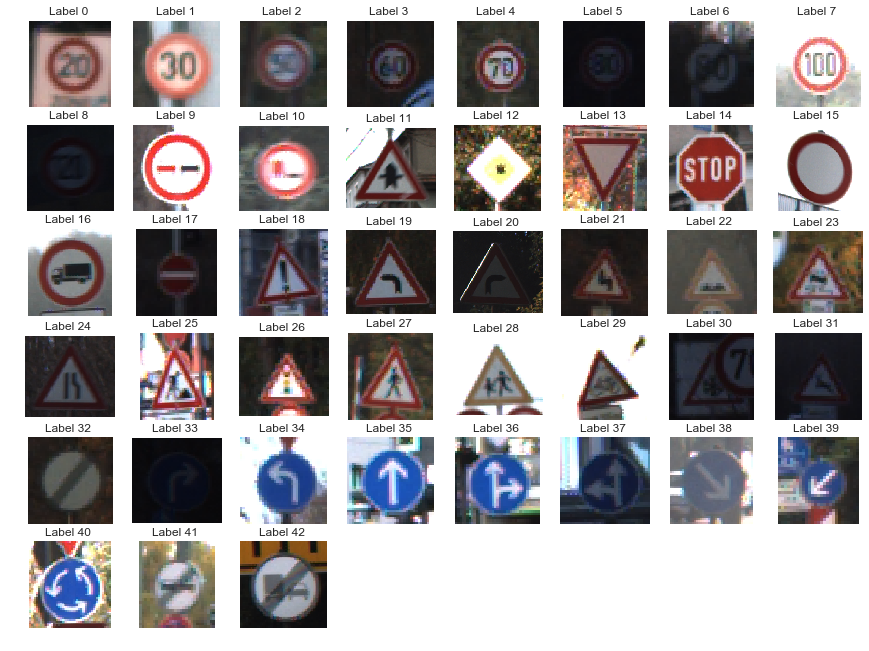

In [5]:
#Display the example images
display_images_and_labels(imagesExample, labelsExample)

## Distribution of the classes

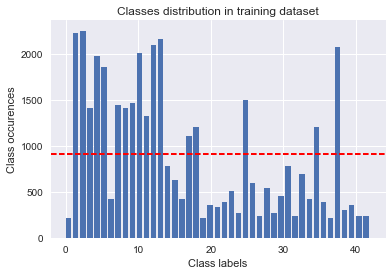

In [24]:
#Return the sorted unique values array and the number of times each of the unique values comes up in the original array:
u, counts = np.unique(labels_int, return_counts=True)


#Plot labels histogram (distribution of the classes in the training dataset)
plt.hist(labels_int,bins=43, width=0.75)

plt.title('Classes distribution in training dataset')
plt.xlabel('Class labels')
plt.ylabel('Class occurences')
#plt.xlim([0,42])



plt.axhline(counts.mean(), color='r', linestyle='dashed', linewidth=2)
#plt.text(0.5, 0.5, 'text', fontsize=30, va='center', ha='center', backgroundcolor='w')

In [103]:
print("Min and max number of imager per class:")
counts.min(), counts.max()

Min and max number of imager per class:


(210, 2250)

**Distribution of the various classes.**            
- The distribution of the classes is highly imbalanced (from 210 to 2250 images).
- This may indicate the need for data generation for the under-represented classes.

### Read HOG features

In [68]:
# Function to read the HOG features for the given class labels
# Returns the HOG features, and a list containing the indices of the labels related to each features vector

def readHOGFeatures(rootpath, HOGindex, labels):
    '''Reads HOG features of the traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of HOG features and list of corresponding labels'''
    HOG = []
    label_indices=[]
    fileIndex = 0
    for label in labels:
        current_label_indices = []
        
        print("Reading HOG features for label: ", label)
    
        subdirectory = format(label, '05d') #class subdirectory
        prefix = rootpath + '/HOG_0' + str(HOGindex) + '/' + subdirectory + '/'         
           
       
        #Get all  files from the class subdirectory 
        files = [filename
                for path, dirs, files in os.walk(prefix)
                for filename in files
                if filename.endswith(".txt")]        

       
        for file in files:
            
            current_label_indices.append(fileIndex)

            gtFile = open(prefix + file) # HOG  file
            gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file


            # loop over all the rows in current HOG file
            HOG_current_file = []
            rowIndex = 0
            for row in gtReader:       
                HOG_current_file.append(row[0]) #read the HOG value                
                rowIndex = rowIndex + 1;

            gtFile.close()
            fileIndex = fileIndex + 1;  
            #HOG_current_label.append(HOG_current_file)
        
            HOG.append(HOG_current_file) #list containing the HOG features of all the images
            
        label_indices.append(current_label_indices)
             
    
    #Create a numpy double array 
    #HOG_string = np.array(HOG_current_label)
    HOG_string = np.array(HOG)    
    HOG_np_double = HOG_string.astype(np.double)
    
    #label_indices_string = np.array(label_indices)    
    #label_indices_np_int = label_indices_string.astype(np.int)
    
    return HOG_np_double, label_indices
    #return HOG

In [69]:
#Read HOG features for some classes 

HOGrootpath = 'C:/Users/alo/Desktop/PERSO/Course_Data_Science_2017/visualizations/GTSRB_Final_Training_HOG/GTSRB_Final_Training_HOG/GTSRB/Final_Training/HOG'
#HOGrootpath = "C:/Users/alaruelo/Desktop/Courses/Springboard_2017/Capstone_project_traffic_signs/Training_dataset/GTSRB_Final_Training_HOG/GTSRB_Final_Training_HOG/GTSRB/Final_Training/HOG"
HOGindex = 1;
#labels = np.arange(0,43)
labels=[2,12,13,25,33]

HOG, indices = readHOGFeatures(HOGrootpath, HOGindex, labels)

Reading HOG features for label:  2
Reading HOG features for label:  12
Reading HOG features for label:  13
Reading HOG features for label:  25
Reading HOG features for label:  33


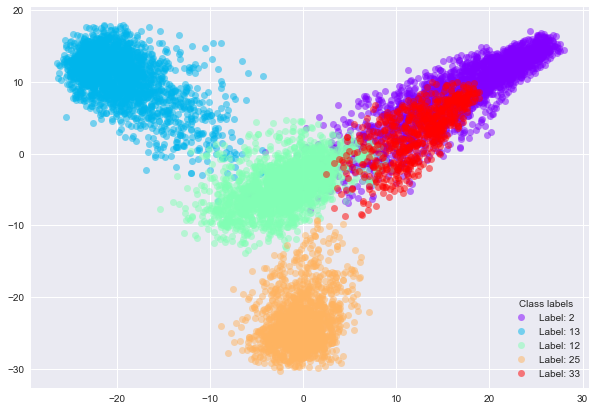

In [64]:
#Apply PCA to the HOG features 
from matplotlib.mlab import PCA
result = PCA(HOG)

#Get PCA results
x = []
y = []
z = []
for item in result.Y:
    x.append(item[0])    
    y.append(item[1])
    z.append(item[2])
    

xnp=np.array(x)
ynp=np.array(y)
#xnp.shape, ynp.shape

# Plot projected results
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, len(labels)))
plt.figure(figsize=(10,7))

i = 0
for label,c in zip(labels,colors):
    ind = indices[int(i)]   
    plt.plot(xnp[ind],ynp[ind],'o', markersize=7, color=c, alpha=0.5, label='Label: ' + str(label))
    i = i + 1;


#plt.legend(labels)  
plt.title('HOG features projected on its first two PCA components')
plt.legend(loc='lower right', title='Class labels')


## Read HAAR features

In [91]:
# Function to read the HAAR features for the given class labels
# Returns the HAAR features, and a list containing the indices of the labels related to each features vector

def readHAARHistograms(rootpath, labels):
    '''Reads the HAAR features of the traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the HAAR features
    Returns:   list of HAAR features and list of corresponding labels'''
    HAAR = []
    label_indices=[]
    fileIndex = 0
    for label in labels:
        current_label_indices = []
        
        print("Reading HAAR features for label: ", label)
    
        subdirectory = format(label, '05d') #class subdirectory
        prefix = rootpath + '/' + subdirectory + '/'    
        
        #Get all  files from the class subdirectory 
        files = [filename
                for path, dirs, files in os.walk(prefix)
                for filename in files
                if filename.endswith(".txt")]     
       
        for file in files:     
                       
            current_label_indices.append(fileIndex)

            gtFile = open(prefix + file) # HAAR  file
            gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file


            # loop over all the rows in current HAAR file
            HAAR_current_file = []
            rowIndex = 0
            for row in gtReader:       
                HAAR_current_file.append(row[0]) #read the HAAR value                
                rowIndex = rowIndex + 1;

            gtFile.close()
            fileIndex = fileIndex + 1;  
            #HOG_current_label.append(HOG_current_file)
        
            HAAR.append(HAAR_current_file) #list containing the HUE features of all the images
            
        label_indices.append(current_label_indices)
             
    
    #Create a numpy double array    
    HAAR_string = np.array(HAAR)    
    HAAR_np_double = HAAR_string.astype(np.double)
    
    #label_indices_string = np.array(label_indices)    
    #label_indices_np_int = label_indices_string.astype(np.int)
    
    return HAAR_np_double, label_indices 

In [92]:
HAARrootpaht="C:/Users/alo/Desktop/PERSO/Course_Data_Science_2017/visualizations/GTSRB_Final_Training_Haar/GTSRB/Final_Training/Haar"
labels=[0,1,2,12,13,25,26,27,33,34,35]
HAAR, indices = readHAARHistograms(HAARrootpaht, labels)

Reading HAAR features for label:  0
Reading HAAR features for label:  1
Reading HAAR features for label:  2
Reading HAAR features for label:  12
Reading HAAR features for label:  13
Reading HAAR features for label:  25
Reading HAAR features for label:  26
Reading HAAR features for label:  27
Reading HAAR features for label:  33
Reading HAAR features for label:  34
Reading HAAR features for label:  35


In [93]:
HAAR.shape

(13589, 11584)

In [94]:
#Apply PCA to the HOG features 
from matplotlib.mlab import PCA
result = PCA(HAAR)



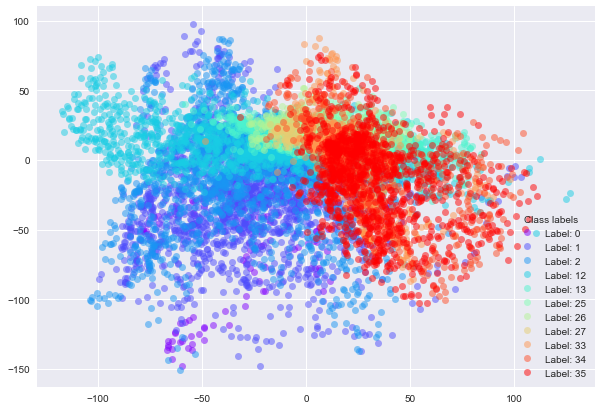

In [95]:
#Get PCA results
x = []
y = []
z = []
for item in result.Y:
    x.append(item[0])    
    y.append(item[1])
    z.append(item[2])
    

xnp=np.array(x)
ynp=np.array(y)
#xnp.shape, ynp.shape

# Plot projected results
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, len(labels)))
plt.figure(figsize=(10,7))

i = 0
for label,c in zip(labels,colors):
    ind = indices[int(i)]   
    plt.plot(xnp[ind],ynp[ind],'o', markersize=7, color=c, alpha=0.5, label='Label: ' + str(label))
    i = i + 1;


#plt.legend(labels)  
plt.legend(loc='lower right', title='Class labels')

- Labels 0,1,2:        speed limit        (blue)
- Label  12:             diamond            (light blue)
- Label  13:             inverted down      (turquoise)
- Labels 25,26,27:   up triangle        (green) 
- Labels 33,34,35:     round blue signals (red)

In [97]:
#Another PCA implementation proposed here (claim to be a much less memory consuming approach): 
#https://stackoverflow.com/questions/13224362/principal-component-analysis-pca-in-python


def PCA(data, dims_rescaled_data=2):
    """
    returns: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    import numpy as NP
    from scipy import linalg as LA
    m, n = data.shape
    # mean center the data
    data -= data.mean(axis=0)
    # calculate the covariance matrix
    R = NP.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric, 
    # the performance gain is substantial
    evals, evecs = LA.eigh(R)
    # sort eigenvalue in decreasing order
    idx = NP.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :dims_rescaled_data]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return NP.dot(evecs.T, data.T).T, evals, evecs

def test_PCA(data, dims_rescaled_data=2):
    '''
    test by attempting to recover original data array from
    the eigenvectors of its covariance matrix & comparing that
    'recovered' array with the original data
    '''
    _ , _ , eigenvectors = PCA(data, dim_rescaled_data=2)
    data_recovered = NP.dot(eigenvectors, m).T
    data_recovered += data_recovered.mean(axis=0)
    assert NP.allclose(data, data_recovered)


def plot_pca(data):
    from matplotlib import pyplot as MPL
    clr1 =  '#2026B2'
    fig = MPL.figure()
    ax1 = fig.add_subplot(111)
    data_resc, data_orig = PCA(data)
    ax1.plot(data_resc[:, 0], data_resc[:, 1], '.', mfc=clr1, mec=clr1)
    MPL.show()



In [99]:
#plot_pca(HAAR)

## Read HUE histograms

In [70]:
# Function to read the HUE histograms for the given class labels
# Returns the HUE histograms, and a list containing the indices of the labels related to each features vector

def readHUEHistograms(rootpath, labels):
    '''Reads the HUE histograms of the traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the HUE histograms
    Returns:   list of HUE histograms and list of corresponding labels'''
    HUE = []
    label_indices=[]
    fileIndex = 0
    for label in labels:
        current_label_indices = []
        
        print("Reading HUE histograms for label: ", label)
    
        subdirectory = format(label, '05d') #class subdirectory
        prefix = rootpath + '/' + subdirectory + '/'            
       
        #Get all  files from the class subdirectory 
        files = [filename
                for path, dirs, files in os.walk(prefix)
                for filename in files
                if filename.endswith(".txt")]     
       
        for file in files:
            
            current_label_indices.append(fileIndex)

            gtFile = open(prefix + file) # HUE  file
            gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file


            # loop over all the rows in current HUE file
            HUE_current_file = []
            rowIndex = 0
            for row in gtReader:       
                HUE_current_file.append(row[0]) #read the HUE value                
                rowIndex = rowIndex + 1;

            gtFile.close()
            fileIndex = fileIndex + 1;  
            #HOG_current_label.append(HOG_current_file)
        
            HUE.append(HUE_current_file) #list containing the HUE features of all the images
            
        label_indices.append(current_label_indices)
             
    
    #Create a numpy double array    
    HUE_string = np.array(HUE)    
    HUE_np_double = HUE_string.astype(np.double)
    
    #label_indices_string = np.array(label_indices)    
    #label_indices_np_int = label_indices_string.astype(np.int)
    
    return HUE_np_double, label_indices 

In [71]:
HUErootpaht="C:/Users/alo/Desktop/PERSO/Course_Data_Science_2017/visualizations/GTSRB_Final_Training_HueHist/GTSRB/Final_Training/HueHist"
HUE, indices = readHUEHistograms(HUErootpaht, labels)

Reading HUE histograms for label:  2
Reading HUE histograms for label:  12
Reading HUE histograms for label:  13
Reading HUE histograms for label:  25
Reading HUE histograms for label:  33


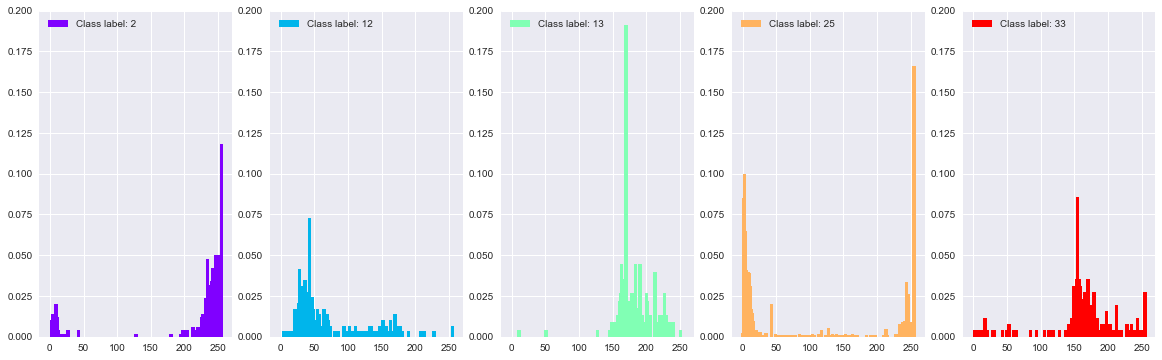

In [73]:
#Plot HUE histograms for various classes

colors = cm.rainbow(np.linspace(0, 1, len(labels)))

fig = plt.figure(figsize=(20, 6))

i = 0
for label,c in zip(labels,colors):   
    #plt.subplot(1,5,i+1) #subplot index starts at 1
    ax = fig.add_subplot(1,5, i+1)
    ind = indices[int(i)] 
    first_label_ind = ind[0]
    HUE_example = HUE[first_label_ind,:]
    plt.bar(np.arange(256), HUE_example, color=c,width=5,label='Class label: ' + str(label))
    plt.ylim([0, 0.2])
    plt.legend(loc='upper left') 
    i = i + 1;
   

**Classes 2 and 33, that are not well separated using the HOG features, have clearly different HUE histograms.**